In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import bisect
sns.set()


In [3]:
def u(xi, a, k, m):
    """
    Menghitung nilai fungsi u(xi, a, k, m).

    Parameter:
    xi (float): Nilai input.
    a (float): Batas nilai.
    k (float): Konstanta.
    m (float): Pangkat.

    Returns:
    float: Nilai fungsi u(xi, a, k, m).
    """
    if xi > a:
        return k * ((xi - a) ** m)
    elif xi < -a:
        return k * ((-xi - a) ** m)
    return 0

# fungsi berikut merepresentasikan fungsi f 12 pada benchmark 
$$
F_{12}(x) = \pi n \left\{10 \sin(\pi y_1) + \sum_{i=-1}^{n} (y_i - 1)^2 [1 + 10 \sin^2(\pi y_{i+1})] + (y_n - 1)^2\right\} + \sum_{i=1}^{n} u(x_i, 10, 100, 4)
$$

In [4]:
def f12_function(x:np.array):
    """
    Menghitung nilai fungsi F12 berdasarkan vektor input x.

    Parameter:
    x (np.array): Vektor input.

    Return:
    float: Nilai fungsi F12 yang dihitung berdasarkan vektor input x.
    """
    n = len(x)
    y = x+1
    term1 = 10 * np.sin(np.pi * y[0])
    term2 = sum((y[:-1] - 1) ** 2 * (1 + 10 * (np.sin(np.pi * y[1:])** 2) ))
    term3 = (y[-1] - 1) ** 2
    sum_u = sum(u(xi, 10, 100, 4) for xi in x)
    
    return np.pi / n * (term1 + term2 + term3) + sum_u
    
    

In [5]:
x1 = np.arange(-10,8)
x2 = np.arange(-10,8)

x1

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7])

In [6]:
pasangan = []
y_hasil= []

for i in x1:
    for j in x2:
        pasangan.append([i,j])
        y_hasil.append(f12_function(np.array([i,j])))

In [7]:
y_hasil

[314.1592653589793,
 284.3141351498763,
 257.610597594363,
 234.0486526924396,
 213.62830044410595,
 196.34954084936206,
 182.21237390820798,
 171.2167996206437,
 163.36281798666923,
 158.65042900628453,
 157.07963267948963,
 158.65042900628453,
 163.36281798666923,
 171.2167996206437,
 182.21237390820798,
 196.34954084936206,
 213.62830044410595,
 234.0486526924396,
 284.3141351498763,
 254.46900494077323,
 227.76546738526,
 204.20352248333654,
 183.78317023500293,
 166.50441064025907,
 152.367243699105,
 141.37166941154072,
 133.51768777756624,
 128.80529879718154,
 127.23450247038664,
 128.80529879718154,
 133.51768777756624,
 141.37166941154072,
 152.367243699105,
 166.50441064025907,
 183.78317023500293,
 204.20352248333654,
 257.610597594363,
 227.76546738526,
 201.06192982974676,
 177.4999849278233,
 157.07963267948966,
 139.8008730847458,
 125.66370614359172,
 114.66813185602744,
 106.81415022205297,
 102.10176124166827,
 100.53096491487337,
 102.10176124166827,
 106.8141502220

In [8]:
ind=y_hasil.index(min(y_hasil))

In [9]:
pasangan[ind]

[0, 0]

In [10]:
x_axes = [x[0] for x in pasangan]
z = [x[1] for x in pasangan]


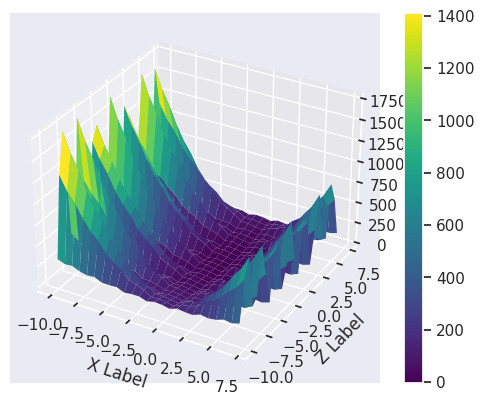

In [11]:
x = np.linspace(-10, 7, 25) 
z = np.linspace(-10, 7, 25) 

X, Y = np.meshgrid(x, z)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = f12_function(np.array([X[i, j], Y[i, j]]))

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('X Label')
ax.set_ylabel('Z Label')
ax.set_zlabel('Z Label')
fig.colorbar(surf)
plt.show()

In [12]:
class PSO:
    def __init__(self,objective_function, n_particles, n_dimensions, w, c1, c2, n_iterations,upper_bound,lower_bound):
        self.obj_function = objective_function
        self.n_particles = n_particles
        self.n_dimensions = n_dimensions
        self.w = w
        self.upper_bound = upper_bound
        self.lower_bound = lower_bound
        self.c1 = c1
        self.c2 = c2
        self.n_iterations = n_iterations
        self.pbest = np.zeros((n_particles, n_dimensions))
        self.gbest = np.zeros(n_dimensions)
        self.pbest_score = np.zeros(n_particles)
        self.gbest_score = math.inf
        self.particles = np.random.rand(n_particles, n_dimensions) * (self.upper_bound-self.lower_bound) + self.lower_bound
        self.velocities = np.zeros((n_particles, n_dimensions))
        self.history_particel = []
    
    def velocity(self,x):
        
        return self.w * x + self.c1 * np.random.rand() * (self.pbest - x) + self.c2 * np.random.rand() * (self.gbest - x)
    
    def position(self,x):
        return x + self.velocity(x)
    
    def fit(self):
        for i in range(self.n_iterations):
            for j in range(self.n_particles):
                score = self.obj_function(self.particles[j])
                if score < self.pbest_score[j]:
                    self.pbest_score[j] = score
                    self.pbest[j] = self.particles[j]
                if score < self.gbest_score:
                    self.gbest_score = score
                    self.gbest = self.particles[j]
            print(f"iterasi-{i+1} : global terbaik {self.gbest} score : {self.gbest_score} ")
            self.velocities = self.velocity(self.particles)
            self.particles = self.position(self.particles)
            self.history_particel.append(self.particles)
        return self.gbest
    

In [13]:
x_1 = [i for i in range(-10,8)]
x_2 = [i for i in range(-10,8)]

ruang_solusi = []
for i in x_1:
    for j in x_2:
        ruang_solusi.append([i,j])

In [14]:
pso = PSO(f12_function,10,2,1,1,1,100,7,-10)
pso.fit()

iterasi-1 : global terbaik [0.96579464 1.65617581] score : 15.487771770892918 
iterasi-2 : global terbaik [0.96579464 1.65617581] score : 15.487771770892918 
iterasi-3 : global terbaik [0.96579464 1.65617581] score : 15.487771770892918 
iterasi-4 : global terbaik [-0.05934833  0.65015452] score : 3.625195508181762 
iterasi-5 : global terbaik [-0.05934833  0.65015452] score : 3.625195508181762 
iterasi-6 : global terbaik [0.51360215 1.52855906] score : -7.498819821373523 
iterasi-7 : global terbaik [0.45819153 0.68955298] score : -12.235854469857317 
iterasi-8 : global terbaik [0.45819153 0.68955298] score : -12.235854469857317 
iterasi-9 : global terbaik [0.45819153 0.68955298] score : -12.235854469857317 
iterasi-10 : global terbaik [0.45819153 0.68955298] score : -12.235854469857317 
iterasi-11 : global terbaik [0.45819153 0.68955298] score : -12.235854469857317 
iterasi-12 : global terbaik [0.45819153 0.68955298] score : -12.235854469857317 
iterasi-13 : global terbaik [0.45819153 0

iterasi-28 : global terbaik [0.45819153 0.68955298] score : -12.235854469857317 
iterasi-29 : global terbaik [0.45819153 0.68955298] score : -12.235854469857317 
iterasi-30 : global terbaik [0.45819153 0.68955298] score : -12.235854469857317 
iterasi-31 : global terbaik [0.45819153 0.68955298] score : -12.235854469857317 
iterasi-32 : global terbaik [0.45819153 0.68955298] score : -12.235854469857317 
iterasi-33 : global terbaik [0.45819153 0.68955298] score : -12.235854469857317 
iterasi-34 : global terbaik [0.45819153 0.68955298] score : -12.235854469857317 
iterasi-35 : global terbaik [0.45819153 0.68955298] score : -12.235854469857317 
iterasi-36 : global terbaik [0.45819153 0.68955298] score : -12.235854469857317 
iterasi-37 : global terbaik [0.45819153 0.68955298] score : -12.235854469857317 
iterasi-38 : global terbaik [0.45819153 0.68955298] score : -12.235854469857317 
iterasi-39 : global terbaik [0.45819153 0.68955298] score : -12.235854469857317 
iterasi-40 : global terbaik 

array([0.5715071 , 0.86017773])

In [15]:
sol = pso.gbest
sol

array([0.5715071 , 0.86017773])

In [16]:
f12_function(np.array([0.57412774 ,  0.40633379]))

-9.764664728012804

In [17]:
import numpy as np
import pyswarms as ps

def F12(x):
    n = x.shape[1]  # Ambil ukuran dimensi
    y = x + 1  # Transformasi x dengan menambahkan 1 ke setiap komponen
    sin_term = np.sin(np.pi * y[:, :-1])
    sin_next = np.sin(np.pi * y[:, 1:])
    term1 = 10 * sin_term[:, 0]
    term2 = np.sum((y[:, :-1] - 1)**2 * (1 + 10 * sin_next**2), axis=1)
    term3 = (y[:, -1] - 1)**2
    print(term2)
    total = (np.pi / n) * (term1 + term2 + term3)
    return total

# Setel opsi optimizer
options = {'c1': 1, 'c2': 1, 'w': 1}

# Buat instance Global Best PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)

# Lakukan optimasi
cost, pos = optimizer.optimize(F12, iters=100)

print("Cost:", cost)
print("Best position:", pos)


2024-05-29 10:04:36,590 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 1}
pyswarms.single.global_best:  18%|█▊        |18/100, best_cost=-15.1

[2.07188427e-05 1.13993334e-01 5.29200630e+00 8.19641816e-01
 6.20447151e-01 8.29641436e-01 1.95101506e-02 7.75759835e-02
 1.12881132e+00 3.96513318e-01]
[ 6.82179286  2.00423222 15.46630807 11.14552564  2.81272389 18.4808667
  2.40539966  7.15704623  2.05352424  6.4632436 ]
[16.31290138  2.60560467  1.06970196  0.97988365  8.4735502  22.1883463
  3.96111272 14.69151231  0.35146182  3.90881682]
[6.09590322 4.52257809 0.29642639 0.01509883 0.89236232 0.11281086
 0.09465834 7.12511135 1.68943914 4.9860491 ]
[6.19605700e-01 1.18059512e+00 1.04312510e-02 6.62300559e-01
 2.05718229e+00 1.52151143e+00 1.63430182e+01 3.35651815e-01
 4.06338837e-01 4.58315105e-02]
[ 0.07571194  0.04234809  1.92479012  0.97830654  0.58799404  1.50588236
 10.22456015 31.25356887  0.77671861  2.61752871]
[ 0.88222145  0.03874063  6.85024327 20.11016237  0.82255895  0.08399336
  0.08637574  4.09319035  0.28823451  0.29685791]
[ 0.31244349  1.22664073 26.24943153 29.72142582  1.14989528 14.143558
 24.51888746 19.91

pyswarms.single.global_best:  35%|███▌      |35/100, best_cost=-15.1

[29.6272358   0.25762566 25.36823837  7.80823361  3.86705276  0.07046022
  7.63360721  0.26567934  2.30659025  0.30204359]
[ 13.13055151  21.9721511    1.13381683   9.55654008  12.44988422
   0.95012554  15.762669   851.6846356    1.13400973   7.2477261 ]
[ 4.21328431 26.35285155 10.3802317   1.00545536  2.7191798   5.96131134
  9.49027375 50.76856398  2.63407651 10.21710895]
[2.32692224e+00 1.73451670e+00 5.19780823e+01 2.84064739e-01
 4.03083587e+00 7.42392357e+00 1.10335493e+00 3.50578480e+02
 7.84972135e-01 1.71887165e+00]
[3.83923854e-02 3.51086634e-01 2.55264754e+01 6.28992754e-01
 4.58309894e-01 3.39493793e+01 1.08620263e+01 1.41192497e+03
 4.52033469e-01 1.12866356e-04]
[4.37114917e+00 1.55687943e+00 1.90522518e+00 1.91049129e+00
 8.02977483e-02 5.93752121e-02 3.49997818e-01 8.51714781e+01
 2.28749336e+00 8.23700976e-04]
[31.64188861  1.23624645  2.86881277  5.17628172  5.61632482  7.11746982
  5.47616793  0.83533404  1.3489333   1.52312288]
[2.60968209e+01 8.90804113e-01 3.971

pyswarms.single.global_best:  62%|██████▏   |62/100, best_cost=-15.1

[1.14054796e+02 8.72681669e-02 1.49380654e+02 1.17391666e-01
 3.17432838e+01 6.11937550e+01 1.22829036e+01 6.05538704e+02
 4.53637924e+00 3.36921772e+00]
[1.14520403e+02 7.52380914e-01 6.26579249e+02 9.85815328e-01
 7.06826022e+01 3.16707538e+00 3.03098506e+00 2.19716166e+03
 4.84988884e+00 2.95511710e+00]
[3.33655439e+01 4.01822938e-01 1.06302204e+02 5.38787509e+00
 6.17822157e+01 3.47831293e+00 6.10924882e+00 5.12571352e+03
 1.35004204e+00 6.76291055e-01]
[ 85.00673448   9.03756426 168.03217141   0.97724761   3.35888489
  24.55766275  13.85753118 249.87349503   0.44098482   0.42147803]
[3.59383847e+02 1.38261607e+01 6.81423900e+02 4.30417673e+00
 3.66690316e+00 1.32368803e+00 1.17208909e+00 4.95953225e+03
 1.81777039e-01 1.95113076e+00]
[2.98619104e+01 3.12902582e+00 6.51461598e+01 2.56891358e-01
 2.79680620e-01 1.96648441e+01 1.03290445e+01 5.83969144e+03
 1.76691376e+00 2.68905405e+01]
[5.41316055e+01 4.76920219e-02 9.97525225e+01 8.48121563e-04
 2.24498432e+01 1.92021209e+02 2.348

pyswarms.single.global_best: 100%|██████████|100/100, best_cost=-15.1
2024-05-29 10:04:37,392 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -15.070935139751604, best pos: [0.50845091 0.07421094]


[4.83196873e+00 1.88161694e+00 1.34454483e+02 1.62991694e+00
 5.99413404e+01 1.70162288e+01 1.24732324e+01 3.66184335e+02
 2.78778139e-03 1.82569676e+02]
[5.10484538e+01 6.41467936e-01 3.93600757e+01 6.96873183e-02
 3.08726991e+00 2.64548656e-01 4.05132822e+01 1.62209706e+03
 2.34480980e-01 2.27093650e+02]
[3.95720413e+02 9.92295899e-05 6.72623459e+01 7.89308917e-02
 1.01292634e+02 1.25629276e+02 1.12924974e+00 3.94450778e+02
 1.58782843e+00 5.82987623e+00]
[3.13800290e+02 7.26438176e-02 8.49740389e+01 5.41992824e-01
 1.11317660e+02 3.34171119e+02 4.63695157e+01 1.02484236e+03
 9.73483169e+00 3.25115715e+01]
[1.14797797e+03 9.93449143e-02 2.19075781e+01 1.41861904e+00
 1.51610184e+01 4.76687620e+00 6.71976487e+01 1.72600148e+03
 1.26636221e+00 1.98529997e+02]
[1.43011445e+00 1.97940467e+00 1.47207045e+02 2.00299406e+01
 2.01536693e+02 2.31937992e+02 3.33588490e-02 1.03550363e+02
 1.27853768e-03 1.55650457e-01]
[1.49484119e+03 2.52178841e+00 3.39910200e+00 5.86963304e+00
 3.13473660e+00

iterasi-1 : global terbaik [2.42439731 1.13800261] score : 12.293613318556499 
iterasi-2 : global terbaik [0.24360647 0.11434792] score : -10.652917288242415 
iterasi-3 : global terbaik [0.39364967 0.23311295] score : -13.42242468213918 
iterasi-4 : global terbaik [0.56805328 0.09278865] score : -14.411288310546738 
iterasi-5 : global terbaik [0.56805328 0.09278865] score : -14.411288310546738 
iterasi-6 : global terbaik [0.45497896 0.14173198] score : -14.59121382105936 
iterasi-7 : global terbaik [0.45497896 0.14173198] score : -14.59121382105936 
iterasi-8 : global terbaik [0.45497896 0.14173198] score : -14.59121382105936 
iterasi-9 : global terbaik [0.45497896 0.14173198] score : -14.59121382105936 
iterasi-10 : global terbaik [0.45497896 0.14173198] score : -14.59121382105936 
iterasi-11 : global terbaik [0.45497896 0.14173198] score : -14.59121382105936 
iterasi-12 : global terbaik [0.45497896 0.14173198] score : -14.59121382105936 
iterasi-13 : global terbaik [0.45497896 0.1417

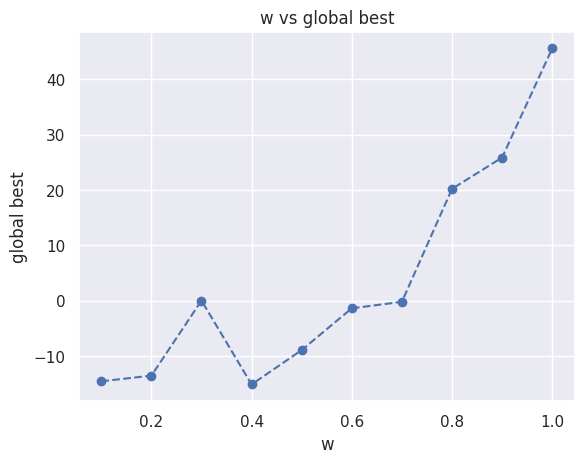

In [18]:
#w range 0.1 - 1 , c1 =1 , c2 = 1 , iterasi = 100 , partikel =10
w = [i/10 for i in range(1,11)]
hasil_w = []
for i in w:
    pso_w = PSO(f12_function,10,2,i,1,1,100,7,-10)
    pso_w.fit()
    hasil_w.append(pso_w.gbest_score)

#plot
plt.plot(w, hasil_w, linestyle='--', marker='o')
plt.xlabel("w")
plt.ylabel("global best")
plt.title("w vs global best")
plt.show()



iterasi-1 : global terbaik [-4.70730032 -1.06462107] score : 63.22944139809114 
iterasi-2 : global terbaik [-3.43620825 -0.07077162] score : 12.179897148102325 
iterasi-3 : global terbaik [-3.43620825 -0.07077162] score : 12.179897148102325 
iterasi-4 : global terbaik [-3.43620825 -0.07077162] score : 12.179897148102325 
iterasi-5 : global terbaik [-3.43620825 -0.07077162] score : 12.179897148102325 
iterasi-6 : global terbaik [-3.43620825 -0.07077162] score : 12.179897148102325 
iterasi-7 : global terbaik [-3.43620825 -0.07077162] score : 12.179897148102325 
iterasi-8 : global terbaik [-3.43620825 -0.07077162] score : 12.179897148102325 
iterasi-9 : global terbaik [-3.43620825 -0.07077162] score : 12.179897148102325 
iterasi-10 : global terbaik [-3.43620825 -0.07077162] score : 12.179897148102325 
iterasi-11 : global terbaik [-3.43620825 -0.07077162] score : 12.179897148102325 
iterasi-12 : global terbaik [-3.43620825 -0.07077162] score : 12.179897148102325 
iterasi-13 : global terbai

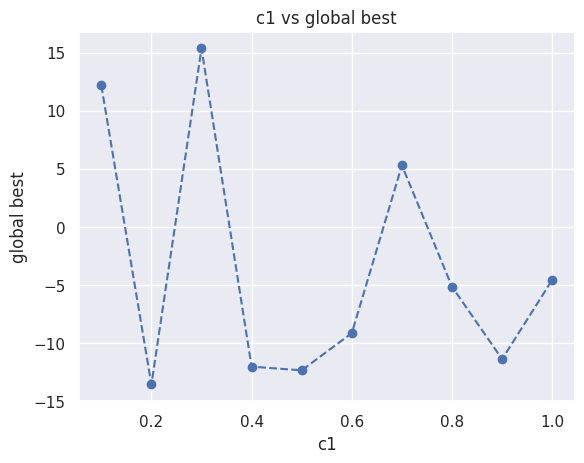

In [19]:
#c1 range 0.1 - 1 , c2 =1 , w = 0.4 , iterasi = 100 , partikel =10

c1 = [i/10 for i in range(1,11)]
hasil_c1 = []
for i in c1:
    pso_c1 = PSO(f12_function,10,2,0.4,i,1,100,7,-10)
    pso_c1.fit()
    hasil_c1.append(pso_c1.gbest_score)

#plot
plt.plot(c1, hasil_c1, linestyle='--', marker='o')
plt.xlabel("c1")
plt.ylabel("global best")
plt.title("c1 vs global best")
plt.show()

iterasi-1 : global terbaik [-0.58576481  4.56266367] score : 53.56440931585132 
iterasi-2 : global terbaik [-0.58576481  4.56266367] score : 53.56440931585132 
iterasi-3 : global terbaik [-0.58576481  4.56266367] score : 53.56440931585132 
iterasi-4 : global terbaik [-0.58576481  4.56266367] score : 53.56440931585132 
iterasi-5 : global terbaik [-0.58576481  4.56266367] score : 53.56440931585132 
iterasi-6 : global terbaik [-0.58576481  4.56266367] score : 53.56440931585132 
iterasi-7 : global terbaik [-0.58576481  4.56266367] score : 53.56440931585132 
iterasi-8 : global terbaik [-0.58576481  4.56266367] score : 53.56440931585132 
iterasi-9 : global terbaik [-0.58576481  4.56266367] score : 53.56440931585132 
iterasi-10 : global terbaik [-0.58576481  4.56266367] score : 53.56440931585132 
iterasi-11 : global terbaik [-0.58576481  4.56266367] score : 53.56440931585132 
iterasi-12 : global terbaik [-0.58576481  4.56266367] score : 53.56440931585132 
iterasi-13 : global terbaik [-0.58576

iterasi-68 : global terbaik [-0.58576481  4.56266367] score : 53.56440931585132 
iterasi-69 : global terbaik [-0.58576481  4.56266367] score : 53.56440931585132 
iterasi-70 : global terbaik [-0.58576481  4.56266367] score : 53.56440931585132 
iterasi-71 : global terbaik [-0.58576481  4.56266367] score : 53.56440931585132 
iterasi-72 : global terbaik [-0.58576481  4.56266367] score : 53.56440931585132 
iterasi-73 : global terbaik [-0.58576481  4.56266367] score : 53.56440931585132 
iterasi-74 : global terbaik [-0.58576481  4.56266367] score : 53.56440931585132 
iterasi-75 : global terbaik [-0.58576481  4.56266367] score : 53.56440931585132 
iterasi-76 : global terbaik [-0.58576481  4.56266367] score : 53.56440931585132 
iterasi-77 : global terbaik [-0.58576481  4.56266367] score : 53.56440931585132 
iterasi-78 : global terbaik [-0.58576481  4.56266367] score : 53.56440931585132 
iterasi-79 : global terbaik [-0.58576481  4.56266367] score : 53.56440931585132 
iterasi-80 : global terbaik 

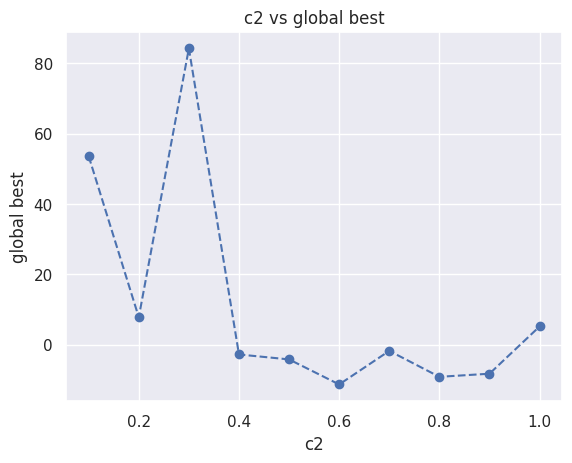

In [20]:
#c2 range 0.1 - 1 , c1 =0.2 , w = 0.4 , iterasi = 100 , partikel =10

c2 = [i/10 for i in range(1,11)]
hasil_c2 = []
for i in c2:
    pso_c2 = PSO(f12_function,10,2,0.4,0.2,i,100,7,-10)
    pso_c2.fit()
    hasil_c2.append(pso_c2.gbest_score)

#plot
plt.plot(c2, hasil_c2, linestyle='--', marker='o')
plt.xlabel("c2")
plt.ylabel("global best")
plt.title("c2 vs global best")
plt.show()

iterasi-1 : global terbaik [-1.96932881 -1.99214405] score : 10.851749596537568 
iterasi-2 : global terbaik [-1.96932881 -1.99214405] score : 10.851749596537568 
iterasi-3 : global terbaik [-1.96932881 -1.99214405] score : 10.851749596537568 
iterasi-4 : global terbaik [-1.96932881 -1.99214405] score : 10.851749596537568 
iterasi-5 : global terbaik [-1.96932881 -1.99214405] score : 10.851749596537568 
iterasi-6 : global terbaik [-1.96932881 -1.99214405] score : 10.851749596537568 
iterasi-7 : global terbaik [-1.96932881 -1.99214405] score : 10.851749596537568 
iterasi-8 : global terbaik [-1.96932881 -1.99214405] score : 10.851749596537568 
iterasi-9 : global terbaik [-1.96932881 -1.99214405] score : 10.851749596537568 
iterasi-10 : global terbaik [-1.96932881 -1.99214405] score : 10.851749596537568 
iterasi-1 : global terbaik [-3.12230729  0.92832939] score : 18.411999332963973 
iterasi-2 : global terbaik [-0.14847627  2.37563111] score : 16.2598555032426 
iterasi-3 : global terbaik [ 

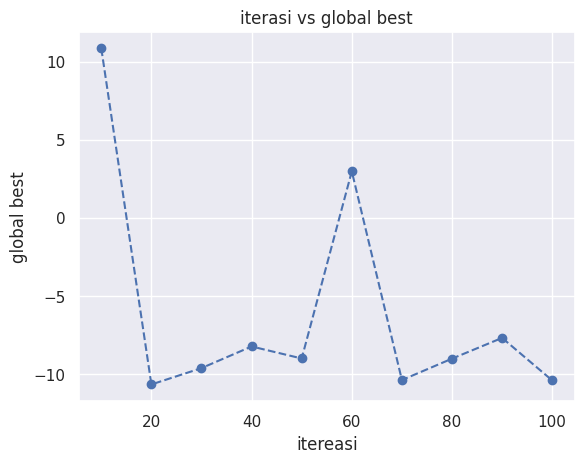

In [21]:
#w =0.4 , c1 =0.2 , c2 = 0.6 , iterasi = 100, iterasi 10 -100 , partikel =10
iter = [i*10 for i in range(1,11)]
hasil_iter = []

for i in iter:
    pso_iter = PSO(f12_function,10,2,0.4,0.2,0.6,int(i),7,-10)
    pso_iter.fit()
    hasil_iter.append(pso_iter.gbest_score)

#plot
plt.plot(iter, hasil_iter, linestyle='--', marker='o')
plt.xlabel("itereasi")
plt.ylabel("global best")
plt.title("iterasi vs global best")
plt.show()

iterasi-1 : global terbaik [-3.50887305 -5.02277756] score : 44.2552110703267 
iterasi-2 : global terbaik [ 2.81040203 -1.92776385] score : 15.712000874756141 
iterasi-3 : global terbaik [ 2.81040203 -1.92776385] score : 15.712000874756141 
iterasi-4 : global terbaik [ 2.81040203 -1.92776385] score : 15.712000874756141 
iterasi-5 : global terbaik [ 2.81040203 -1.92776385] score : 15.712000874756141 
iterasi-6 : global terbaik [ 2.81040203 -1.92776385] score : 15.712000874756141 
iterasi-7 : global terbaik [ 2.81040203 -1.92776385] score : 15.712000874756141 
iterasi-8 : global terbaik [ 2.81040203 -1.92776385] score : 15.712000874756141 
iterasi-9 : global terbaik [ 2.81040203 -1.92776385] score : 15.712000874756141 
iterasi-10 : global terbaik [ 2.81040203 -1.92776385] score : 15.712000874756141 
iterasi-11 : global terbaik [ 2.81040203 -1.92776385] score : 15.712000874756141 
iterasi-12 : global terbaik [ 2.81040203 -1.92776385] score : 15.712000874756141 
iterasi-13 : global terbaik

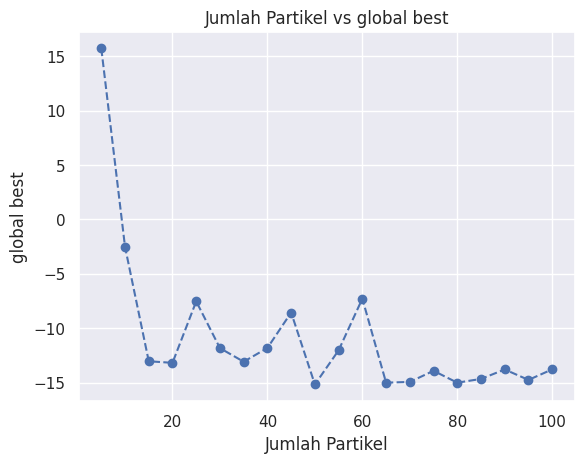

In [22]:
#w = 0.4 , c1 =0.2 , c2 = 0.6 , iterasi = 20, , partikel 5 -100
parti = [i*5 for i in range(1,21)]
hasil_parti = []

for i in parti:
    pso_parti = PSO(f12_function,int(i),2,0.4,0.2,0.6,20,7,-10)
    pso_parti.fit()
    hasil_parti.append(pso_parti.gbest_score)

#plot
plt.plot(parti, hasil_parti, linestyle='--', marker='o')
plt.xlabel("Jumlah Partikel")
plt.ylabel("global best")
plt.title("Jumlah Partikel vs global best")
plt.show()

In [31]:
"""_summary_
parameter optimal pso
c1 : 0.2
c2 : 0.6
w : 0.4
iterasi : 20
jumlah partikel :50
"""

pso2 = PSO(f12_function,50,2,0.4,0.2,0.6,20,7,-10)
pso2.fit()

iterasi-1 : global terbaik [-1.29823632  0.78800806] score : 1.0721805608290687 
iterasi-2 : global terbaik [ 0.33897405 -0.02825078] score : -13.544607856652808 
iterasi-3 : global terbaik [ 0.47456368 -0.0395511 ] score : -15.24728325994804 
iterasi-4 : global terbaik [ 0.47456368 -0.0395511 ] score : -15.24728325994804 
iterasi-5 : global terbaik [ 0.47456368 -0.0395511 ] score : -15.24728325994804 
iterasi-6 : global terbaik [ 0.47456368 -0.0395511 ] score : -15.24728325994804 
iterasi-7 : global terbaik [ 0.47456368 -0.0395511 ] score : -15.24728325994804 
iterasi-8 : global terbaik [ 0.47456368 -0.0395511 ] score : -15.24728325994804 
iterasi-9 : global terbaik [ 0.47456368 -0.0395511 ] score : -15.24728325994804 
iterasi-10 : global terbaik [ 0.47456368 -0.0395511 ] score : -15.24728325994804 
iterasi-11 : global terbaik [ 0.47456368 -0.0395511 ] score : -15.24728325994804 
iterasi-12 : global terbaik [ 0.47456368 -0.0395511 ] score : -15.24728325994804 
iterasi-13 : global terb

array([ 0.47456368, -0.0395511 ])

/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/ML/optimalisasi_F12_PSO_ACO/.env/lib64/python3.12/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


iterasi-1 : global terbaik [0.4850362  1.64157061] score : -8.076745664048566 
iterasi-2 : global terbaik [0.20204622 0.22580592] score : -8.898124818029704 
iterasi-3 : global terbaik [0.28286471 0.31612829] score : -11.028076633501643 
iterasi-4 : global terbaik [0.39601059 0.44257961] score : -11.939035487876135 
iterasi-5 : global terbaik [0.39601059 0.44257961] score : -11.939035487876135 
iterasi-6 : global terbaik [0.39601059 0.44257961] score : -11.939035487876135 
iterasi-7 : global terbaik [0.39601059 0.44257961] score : -11.939035487876135 
iterasi-8 : global terbaik [0.39601059 0.44257961] score : -11.939035487876135 
iterasi-9 : global terbaik [0.39601059 0.44257961] score : -11.939035487876135 
iterasi-10 : global terbaik [0.39601059 0.44257961] score : -11.939035487876135 
iterasi-11 : global terbaik [0.39601059 0.44257961] score : -11.939035487876135 
iterasi-12 : global terbaik [0.39601059 0.44257961] score : -11.939035487876135 
iterasi-13 : global terbaik [0.39601059

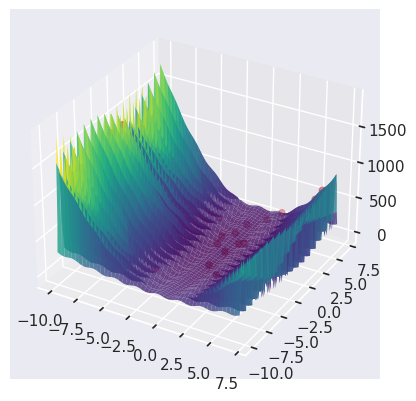

In [34]:
x = np.linspace(-10, 7, 100)
y = np.linspace(-10, 7, 100)
X, Y = np.meshgrid(x, y)
Z = np.array([f12_function(np.array([xi, yi])) for xi, yi in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)
pso3 = PSO(f12_function,50,2,0.4,0.2,0.6,20,7,-10)
points = ax.scatter(pso3.particles[:, 0], pso3.particles[:, 1], [f12_function(p) for p in pso3.particles], color='r')
pso3.fit()
list_poin = pso3.history_particel


def update(frame):
    titik_poin = list_poin[frame]
    print(titik_poin)
    points._offsets3d = (titik_poin[:, 0], titik_poin[:, 1], [f12_function(p) for p in titik_poin])
    return points,

ani = FuncAnimation(fig, update, frames=np.arange(len(list_poin)), interval=100,)
plt.show()

#Laporan hasil percobaan 
hyperparameter yang optimal untuk PSO pada kasus f12 ini adalah :

parameter optimal pso
c1 : 0.2
c2 : 0.6
w : 0.4
iterasi : 20
jumlah partikel : 50

ini didapatkan dengan melihat grafik hasil uji pada masing-masing parameter , dititik mana parameter yang sedang dioptimalkan optimal. 

dengan parameter tersebut di dapatkan titik optimalnya ada di titil (0.39601059 0.44257961) dengan score nya -11.939035487876135 

JIka mengacu pada dokumentassi di matlab, score untuk optimum global ada pada titik 0,0 dengan score 0 
namun pada percobaan kali ini yang di dapatkan titik optimalnya 0.3747,-1,00 dengan score -12.7
sejujurnya jika diamati secara intuisi jika range kontinyu bukan integer diantara -10,7 kita akan dapati bahwa akan ada score minus ketika persamaan $$ 10 \sin(\pi y_1)$$ ketika 2>y_1 > 1 diamana menghasilkan sinus negatif yang tinggi. Yang menyebabkan nilainya menjadi negatif secara keseluruhan fungsi karena elemen persamaan lainnya tidak cukup mengimbanginya. Namun jika ruang solusi dibatasi pada bilagan bulat saja maka akan di dapatkan titik optimumnya pada titik 0,0. 

Meskipun demikian jikapun ruang solkusi ini kontinyu , hasil dari PSO belum cukup optimal meski sudah cukup baik, karena masih ada titik optimal lainnya yang lebih kecil. Penyebab PSO belum mencapai titik optimalnya dikarenakan configuration hyperparameter yang belum cukup optimal. Hyperparameter ini salah satunya adalah jumlah iterasi, jumlah partikel yang digenerate dll. 

In [5]:
#ACO 
class ACO:
    def __init__(self, alpha,beta,rho,n_ants,n_iterations,n_kota, ruang_solusi, funtion_obj):
        """
        Inisialisasi objek ACO (Ant Colony Optimization).

        Parameters:
        - alpha (float): Nilai alpha untuk mengontrol pengaruh feromon.
        - beta (float): Nilai beta untuk mengontrol pengaruh jarak.
        - rho (float): Nilai rho untuk mengontrol penguapan feromon.
        - n_ants (int): Jumlah semut yang akan digunakan.
        - n_iterations (int): Jumlah iterasi yang akan dilakukan.
        - n_kota (int): Jumlah kota yang ada.
        - ruang_solusi (list): Daftar kota yang akan dijadikan ruang solusi.
        - funtion_obj (function): Fungsi objektif yang akan dioptimasi.

        Attributes:
        - alpha (float): Nilai alpha untuk mengontrol pengaruh feromon.
        - beta (float): Nilai beta untuk mengontrol pengaruh jarak.
        - rho (float): Nilai rho untuk mengontrol penguapan feromon.
        - feromon (numpy.ndarray): Matriks feromon.
        - ruang_solusi (list): Daftar kota yang akan dijadikan ruang solusi.
        - function_obj (function): Fungsi objektif yang akan dioptimasi.
        - history_path (list): Daftar path yang dilalui oleh setiap semut.
        - n_iterations (int): Jumlah iterasi yang akan dilakukan.
        - global_optimum (float): Nilai optimum global.
        - global_point (list): Titik optimum global.
        - matrix_distance (numpy.ndarray): Matriks jarak antar kota.
        - n_ants (int): Jumlah semut yang akan digunakan.
        - n_kota (int): Jumlah kota yang ada.
        """
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.feromon = np.ones((len(ruang_solusi),len(ruang_solusi)))
        self.ruang_solusi = ruang_solusi
        self.function_obj = funtion_obj
        self.history_path = [[] for _ in range(n_ants)]
        self.n_iterations = n_iterations
        self.global_optimum = math.inf
        self.global_point = None
        self.matrix_distance = self.distance()
        self.n_ants = n_ants
        self.n_kota = n_kota
    
    def distance(self):
        """
        Menghitung matriks jarak antar kota.

        Returns:
        - result (numpy.ndarray): Matriks jarak antar kota.
        """
        distance = []
        for i in range(len(self.ruang_solusi)):
            row_matrix = []
            for j in range(len(self.ruang_solusi)):
                if i !=j:
                    row_matrix.append(self.function_obj(np.array(self.ruang_solusi[j]))/self.function_obj(np.array(self.ruang_solusi[i])))
                else:
                    row_matrix.append(0)
            distance.append(row_matrix)
        
        distance_float = np.array(distance).astype(float)
        result = np.where(distance_float != 0, 1/distance_float, 0)
        
        return result
    
    def probability(self, dari,ke,feromon):
        """
        Menghitung probabilitas pemilihan kota tujuan.

        Parameters:
        - dari (int): Indeks kota asal.
        - ke (int): Indeks kota tujuan.
        - feromon (numpy.ndarray): Matriks feromon.

        Returns:
        - prob (float): Probabilitas pemilihan kota tujuan.
        """
        penyebut = sum((feromon[dari]** self.alpha)*(self.matrix_distance[dari]** self.beta))
        return ((feromon[dari,ke] ** self.alpha) * (self.matrix_distance[dari,ke] ** self.beta))/penyebut
    
    def roulette_whell(self,probs):
        """
        Memilih kota tujuan menggunakan metode roulette wheel.

        Parameters:
        - probs (dict): Dictionary probabilitas pemilihan kota tujuan.

        Returns:
        - hasil (int): Indeks kota tujuan yang terpilih.
        """
        rand = np.random.rand()
        key = [ke for ke in probs.keys()]
        cumulative_probs = [probs[k] for k in key]
        index = bisect.bisect(cumulative_probs,rand)
        hasil = key[index]
        
        return hasil
    
    def increase_feromon(self, path):
        """
        Meningkatkan nilai feromon pada jalur yang dilalui oleh setiap semut.

        Parameters:
        - path (list): Daftar path yang dilalui oleh setiap semut.
        """
        for pth in path:
            for i in range(len(pth)-1):
                self.feromon[pth[i],pth[i+1]] += 1/self.function_obj(np.array(self.ruang_solusi[i]))
    
    def decrease_feromon(self):
        """
        Mengurangi nilai feromon pada seluruh matriks feromon.
        """
        for i in range(len(self.feromon)):
            for j in range(len(self.feromon)):
                self.feromon[i,j] = (1-self.rho)*self.feromon[i,j]
    
    def fit(self):
        """
        Melakukan proses optimisasi menggunakan algoritma ACO.
        """
        for i in range(self.n_iterations):
            posisi_0 = np.random.choice(len(self.ruang_solusi))
            hist_Path = []
            for sem in range(self.n_ants):
                semut_path = [posisi_0]
                dari = posisi_0
                kota_visit = [dari]
                feromon_individu = self.feromon.copy()
                for _ in range(self.n_kota):
                    self.history_path[sem].append(self.ruang_solusi[dari])
                    for vis in kota_visit:
                        feromon_individu[dari,vis] = 0
                    proba = 0
                    probs = {}
                    for  tuju in range(len(self.ruang_solusi)):
                        if tuju  != dari:
                            proba += self.probability(dari,tuju,feromon_individu)
                            probs[tuju] = proba
                        
                    ke = self.roulette_whell(probs)
                    while ke in kota_visit:
                        ke = self.roulette_whell(probs)
                    
                    if self.function_obj(np.array(self.ruang_solusi[ke])) < self.function_obj(np.array(self.ruang_solusi[dari])):
                        kota_visit.append(ke)
                        semut_path.append(ke)
                        dari = ke
                hist_Path.append(semut_path)
            self.decrease_feromon()
            self.increase_feromon(hist_Path)
            
            for pos in  hist_Path:
                score = self.function_obj(np.array(self.ruang_solusi[pos[-1]]))
                if score < self.global_optimum:
                    self.global_optimum = score
                    self.global_point = self.ruang_solusi[pos[-1]]
            
            print(f'Iterasi - {i+1} : global optimum {self.global_point} score : {self.global_optimum}')
            
                    
                
                
                
                
    
    
    
        

In [7]:
x_1 = [i for i in range(-10,8)]
x_2 = x_1

In [8]:
ruang_solusi = [[i,j] for i in x_1 for j in x_2]
ruang_solusi

[[-10, -10],
 [-10, -9],
 [-10, -8],
 [-10, -7],
 [-10, -6],
 [-10, -5],
 [-10, -4],
 [-10, -3],
 [-10, -2],
 [-10, -1],
 [-10, 0],
 [-10, 1],
 [-10, 2],
 [-10, 3],
 [-10, 4],
 [-10, 5],
 [-10, 6],
 [-10, 7],
 [-9, -10],
 [-9, -9],
 [-9, -8],
 [-9, -7],
 [-9, -6],
 [-9, -5],
 [-9, -4],
 [-9, -3],
 [-9, -2],
 [-9, -1],
 [-9, 0],
 [-9, 1],
 [-9, 2],
 [-9, 3],
 [-9, 4],
 [-9, 5],
 [-9, 6],
 [-9, 7],
 [-8, -10],
 [-8, -9],
 [-8, -8],
 [-8, -7],
 [-8, -6],
 [-8, -5],
 [-8, -4],
 [-8, -3],
 [-8, -2],
 [-8, -1],
 [-8, 0],
 [-8, 1],
 [-8, 2],
 [-8, 3],
 [-8, 4],
 [-8, 5],
 [-8, 6],
 [-8, 7],
 [-7, -10],
 [-7, -9],
 [-7, -8],
 [-7, -7],
 [-7, -6],
 [-7, -5],
 [-7, -4],
 [-7, -3],
 [-7, -2],
 [-7, -1],
 [-7, 0],
 [-7, 1],
 [-7, 2],
 [-7, 3],
 [-7, 4],
 [-7, 5],
 [-7, 6],
 [-7, 7],
 [-6, -10],
 [-6, -9],
 [-6, -8],
 [-6, -7],
 [-6, -6],
 [-6, -5],
 [-6, -4],
 [-6, -3],
 [-6, -2],
 [-6, -1],
 [-6, 0],
 [-6, 1],
 [-6, 2],
 [-6, 3],
 [-6, 4],
 [-6, 5],
 [-6, 6],
 [-6, 7],
 [-5, -10],
 [-5, -9],
 [-5

In [50]:
aco = ACO(1,1,0.5,10,20,100,ruang_solusi,f12_function)

/tmp/ipykernel_10985/1063348410.py:30: RuntimeWarning: divide by zero encountered in divide
  result = np.where(distance_float != 0, 1/distance_float, 0)


In [51]:
aco.matrix_distance

array([[0.        , 1.10497238, 1.2195122 , ..., 2.7027027 , 2.35294118,
        2.04081633],
       [0.905     , 0.        , 1.10365854, ..., 2.44594595, 2.12941176,
        1.84693878],
       [0.82      , 0.90607735, 0.        , ..., 2.21621622, 1.92941176,
        1.67346939],
       ...,
       [0.37      , 0.40883978, 0.45121951, ..., 0.        , 0.87058824,
        0.75510204],
       [0.425     , 0.46961326, 0.51829268, ..., 1.14864865, 0.        ,
        0.86734694],
       [0.49      , 0.54143646, 0.59756098, ..., 1.32432432, 1.15294118,
        0.        ]])

In [52]:
aco.fit()

Iterasi - 1 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 2 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 3 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 4 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 5 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 6 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 7 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 8 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 9 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 10 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 11 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 12 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 13 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 14 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 15 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 16 : glob

In [54]:
aco.hisoty_path[0]

[[6, -7],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [-9, -9],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0]

/tmp/ipykernel_10985/1063348410.py:30: RuntimeWarning: divide by zero encountered in divide
  result = np.where(distance_float != 0, 1/distance_float, 0)


Iterasi - 1 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 2 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 3 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 4 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 5 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 6 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 7 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 8 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 9 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 10 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 11 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 12 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 13 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 14 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 15 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 16 : glob

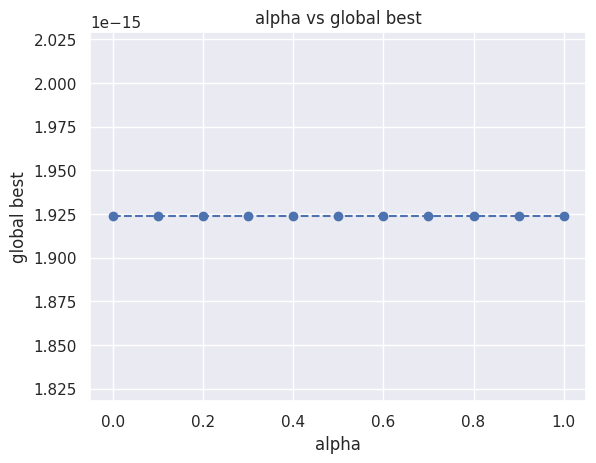

In [56]:
#alpha range 0.1 - 1 , beta =1 , rho = 0.5 , n_ants = 10 ,iterasi = 20 , n_CITY = 100
alpha = [i/10 for i in range(11)]
hasil_alpha = []
for i in alpha:
    aco_alpha= ACO(i,1,0.5,10,20,100,ruang_solusi,f12_function)
    aco_alpha.fit()
    hasil_alpha.append(aco_alpha.global_optimum)

#plot
plt.plot(alpha, hasil_alpha, linestyle='--', marker='o')
plt.xlabel("alpha")
plt.ylabel("global best")
plt.title("alpha vs global best")
plt.show()



/tmp/ipykernel_92400/1063348410.py:30: RuntimeWarning: divide by zero encountered in divide
  result = np.where(distance_float != 0, 1/distance_float, 0)


Iterasi - 1 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 2 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 3 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 4 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 5 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 6 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 7 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 8 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 9 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 10 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 11 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 12 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 13 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 14 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 15 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 16 : glob

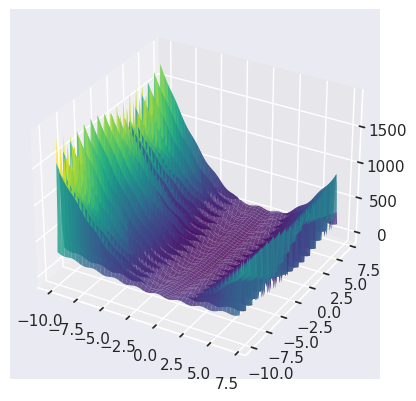

In [13]:
#animasi ACO
x = np.linspace(-10, 7, 100)
y = np.linspace(-10, 7, 100)
X, Y = np.meshgrid(x, y)
Z = np.array([f12_function(np.array([xi, yi])) for xi, yi in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)
aco3= ACO(1,1,0.5,10,20,100,ruang_solusi,f12_function)
aco3.fit()
semut_list = [[j[i]for j in aco3.hisoty_path] for i in range(len(aco3.hisoty_path[0]) )]
semut_array = np.array(semut_list)
points = ax.scatter(semut_array[0][:, 0], semut_array[0][:, 1], [f12_function(p) for p in semut_array[0]], color='r')



def update2(frame):
    print('a')
    titik_poin = semut_array[frame]
    print(titik_poin)
    points._offsets3d = (titik_poin[:, 0], titik_poin[:, 1], [f12_function(p) for p in titik_poin])
    return points,

ani = FuncAnimation(fig, update2, frames=np.arange(len(semut_array)), interval=100,)
plt.show()